In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [21]:
#Find date of last data point 
last = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(last)



('2017-08-23',)


In [25]:
# Calculate the date 1 year ago from the last data point in the database

last_year = dt.date(2017,8,23) - dt.timedelta(days=365)
print(last_year)

2016-08-23


In [29]:
# Perform a query to retrieve the data and precipitation scores
lastyear_query = session.query(measurement.date, measurement.prcp).\
    filter(func.strftime(measurement.date) >= "2016-08-23").all()


In [33]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(lastyear_query).set_index("date")
precip_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [34]:
# Sort the dataframe by date
precip_df = precip_df.sort_index()
precip_df


,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


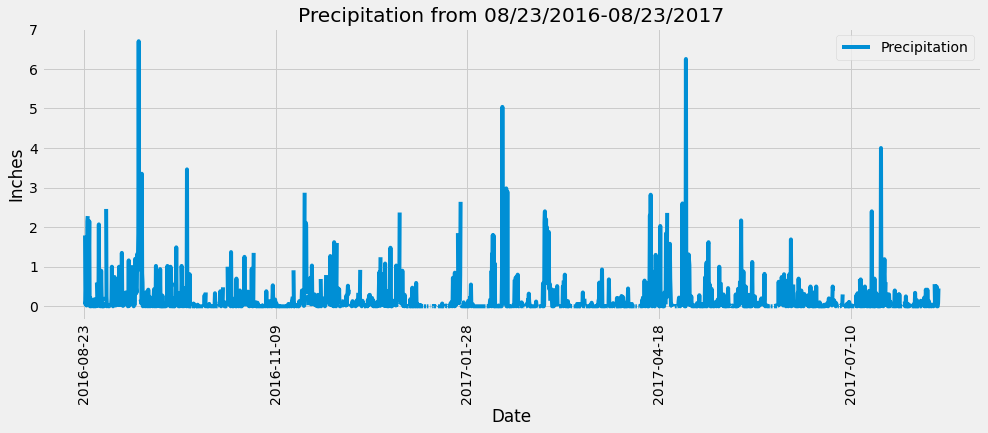

In [45]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(rot=90, figsize=(15,5))
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Precipitation from 08/23/2016-08/23/2017")
plt.legend(("Precipitation",))
plt.show()

In [41]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [49]:
# Design a query to show how many stations are available in this dataset?
from sqlalchemy import distinct
number_stations = session.query(func.count(distinct(measurement.station))).all()
station_names = session.query(distinct(measurement.station)).all()
station_names

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [63]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [64]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
temp_data = session.query(func.min(measurement.tobs), \
    func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == "USC00519281").\
    order_by(measurement.tobs).all()
temp_data
   


[(54.0, 85.0, 71.66378066378067)]

In [70]:
# Choose the station with the highest number of temperature observations.

results = session.query(measurement.tobs).\
    filter(measurement.station == "USC00519281").\
    filter(func.strftime(measurement.date) >= "2016-08-23").\
    order_by(measurement.tobs).all()
temp_results = [result[0] for result in results]


AttributeError: module 'matplotlib.pyplot' has no attribute 'xaxis'

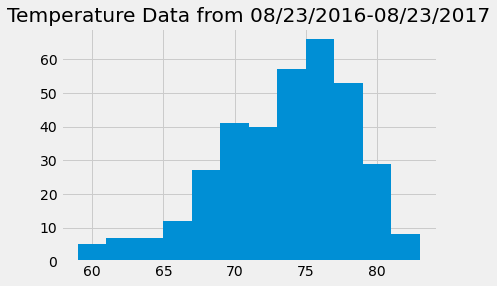

In [73]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.hist(temp_results, bins=12)
plt.title("Temperature Data from 08/23/2016-08/23/2017")
plt.xaxis("Temperature")
plt.yaxis("Frequency")
plt.show()